# Assignment 3
##  Submitted by: Arshad Ali  
## 214102301

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Question 1

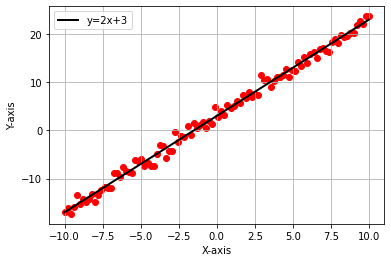

In [3]:
a=2
b=3

N=100
x=np.linspace(-10,10,N)     # 100 points in the range [-10,10]

y= a*x + b   

mu=0    # mean=0
sigma=1 # std deviation=1

noise_pts=np.random.normal(mu, sigma, N)  # picking 100 random points from a normal distribution
y_points=y+sigma*noise_pts  #   addding the gaussian_points to the line y = 2x + 3

plt.plot(x,y,label='y=2x+3',linewidth=2,color='black')    # plotting the line y = 2x + 3
plt.scatter(x,y_points,color='red')   #   scatter plot of points mixed with noise
plt.ylabel('Y-axis')
plt.xlabel('X-axis')
plt.legend()
plt.grid()

## Question 2

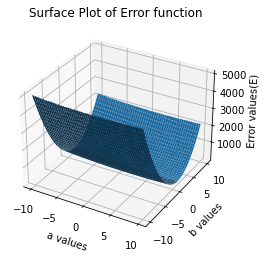

In [71]:
a =  np.arange(-10,10,0.1)              # Varying a in the range [-10:0.1:10]
b =  np.arange(-10,10,0.1)              # Varying b in the range [-10:0.1:10]
mu = 0
sigma = 1
E = np.zeros((len(a),len(b)))

for i in range(len(a)):
    for j in range(len(b)):
    
        
        x = np.linspace(-10,10,100)                    # 100 points in the range [-10,10]
        y = np.array([(2*k+3) for k in x])         # Calculating y from respective x values
        
        
        noise_pts = np.random.normal(mu,sigma,100) # picking 100 random points from a normal distribution
        y_points = y + (sigma*noise_pts)  #   addding the gaussian_points to the line y = 2x + 3
      
        
        
        y_hat = np.array([(a[i]*k+b[j]) for k in x])  # Calculating y_hat for all values of x
     
        e = y_points - y_hat
        
        # Calculating Mean Square Error for each value of a & b
        for m in range(len(e)):
            E[i][j] = E[i][j] + ((e[m])*(e[m]))   
        E[i][j] = E[i][j]/len(e)

        

        
surf_x , surf_y = np.meshgrid(a,b)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(surf_x,surf_y,E)
ax.set_xlabel('a values')
ax.set_ylabel('b values')
ax.set_zlabel('Error values(E)')
ax.set_title('Surface Plot of Error function')
plt.grid()


## Question 3

In [9]:
from numpy import array
from numpy.linalg import pinv


a=2
b=3
N=100
x=np.linspace(-10,10,N)     # 100 points in the range [-10,10]
y= a*x + b   

mu=0    # mean=0
sigma=1 # std deviation=1

noise_pts=np.random.normal(mu, sigma, N)  # picking 100 random points from a normal distribution
y_points=y+sigma*noise_pts  #   addding the gaussian_points to the line y = 2x + 3


x2 = np.ones(100)
x_points = np.array([x,x2]).T

w = pinv(x_points).dot(y_points) # w = (a b)T
print("a = ",w[0])
print("b = ",w[1])

a =  1.9831078112106963
b =  2.931936988254429


## Question 4

In [70]:
a0 , b0 = 1,3    #Initial guess
neta = 0.01      # Update Rate
p = np.array([a0,b0])
deltaE_a = 0
deltaE_b = 0

for i in range(100):
        x = np.linspace(-10,10,100)                    # 100 points in the range [-10,10]
        y = np.array([(2*k+3) for k in x])             # Calculating y from respective x values
        
        noise_pts = np.random.normal(mu,sigma,100)     # picking 100 random points from a normal distribution
        y_points = y + (sigma*noise_pts)               # addding the gaussian_points to the line y = 2x + 3
      
        y_hat = np.array([(p[0]*k+p[1]) for k in x])   # Calculating y_hat for all values of x
     
        e =  y_hat - y_points 
        
        # Calculating Delta E
        for m in range(len(e)):
            deltaE_b = deltaE_b + e[m]
            deltaE_a = deltaE_a + (e[m]*x[m])
        deltaE_a = 2*deltaE_a/(len(e))
        deltaE_b = 2*deltaE_b/(len(e))
        
        p = p - neta*np.array([deltaE_a,deltaE_b])
        
print("a: ",p[0])
print("b: ",p[1])

a:  2.0027059255273607
b:  3.0026063541860437


## Question 5

Per capita income in 2020 will be:  41288.69409441785 USD
Per capita income in 2021 will be:  42117.15916964039 USD
Per capita income in 2025 will be:  45431.01947053126 USD


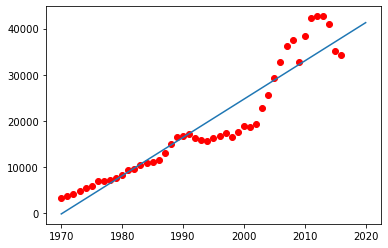

In [36]:
df = pd.read_csv('canada_per_capita_income.csv')

X = df['Year'].values
y = df['per capita income (US$)'].values


x_ones = np.ones(47)
x_pts = np.array([X,x_ones]).T

ans = pinv(x_pts).dot(y) # ans = (a b)T

x_regressor = np.linspace(1970,2020,500)
y_regressor = np.array([ans[0]*i + ans[1] for i in x_regressor])
plt.plot(x_regressor,y_regressor)

plt.scatter(X,y,color='r')
plt.plot()

print("Per capita income in 2020 will be: ",ans[0]*2020 + ans[1],"USD")
print("Per capita income in 2021 will be: ",ans[0]*2021 + ans[1],"USD")
print("Per capita income in 2025 will be: ",ans[0]*2025 + ans[1] ,"USD")


## Question 6

In [68]:
df = pd.read_csv('hiring.csv')
X = df.iloc[:, :-1].fillna(0) # Replacing NA values with 0

# Converting categorical data to numerical
X['experience'] = X['experience'].replace({'five':5,'two':2, 'three':3, 'seven':7,'ten':10,'eleven':11}) 
X['ones'] = 1

X.values
y = df.iloc[:, -1].values

ans_multiLR = pinv(X).dot(y) # ans = (a b)T

# Predictions
pred_1 = ans_multiLR[0]*4 + ans_multiLR[1]*8 + ans_multiLR[2]*8 + ans_multiLR[3] #Exp=4 , Test_Score=8, Interview_Score=8
pred_2 = ans_multiLR[0]*4 + ans_multiLR[1]*8 + ans_multiLR[2]*5 + ans_multiLR[3] #Exp=4 , Test_Score=8, Interview_Score=5
pred_3 = ans_multiLR[0]*4 + ans_multiLR[1]*5 + ans_multiLR[2]*8 + ans_multiLR[3] #Exp=4 , Test_Score=5, Interview_Score=8

print("Expected salary for candidate with 4 yrs Exp, Test Score of 8 and Interview Score of 8 is",int(pred_1))
print("Expected salary for candidate with 4 yrs Exp, Test Score of 8 and Interview Score of 5 is",int(pred_2))
print("Expected salary for candidate with 4 yrs Exp, Test Score of 5 and Interview Score of 8 is",int(pred_3))

Expected salary for candidate with 4 yrs Exp, Test Score of 8 and Interview Score of 8 is 62081
Expected salary for candidate with 4 yrs Exp, Test Score of 8 and Interview Score of 5 is 55725
Expected salary for candidate with 4 yrs Exp, Test Score of 5 and Interview Score of 8 is 59081
